In [2]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

Loading the Dataset and seeing the images

In [4]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

y = 1


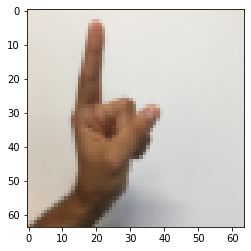

In [5]:
index = 47
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

Splitting data into train and test sets

In [6]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


Forming the Convolutional Model

In [7]:
def convolutional_model(input_shape):

    input_img = tf.keras.Input(shape=input_shape)

    Z1 = tfl.Conv2D(filters=8, kernel_size=(4,4), strides=(1, 1), padding='same')(input_img)
    
    A1 = tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(Z1)
    
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same', data_format=None)(A1)
    
    Z2 = tfl.Conv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='same')(P1)
    
    A2 = tfl.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(Z2)
    
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4,4), padding='same', data_format=None)(A2)
    
    F = tfl.Flatten(data_format=None)(P2)
    
    outputs = tfl.Dense(6, activation = 'softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    
    return model

In [12]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                                           

Training the Convolutional Model

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100


2022-06-26 10:23:07.396680: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-26 10:23:07.396978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 3s 32ms/step - loss: 1.8022 - accuracy: 0.1796 - val_loss: 1.7905 - val_accuracy: 0.2083
Epoch 2/100
 4/17 [======>.......................] - ETA: 0s - loss: 1.7947 - accuracy: 0.1953

2022-06-26 10:23:10.344927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 0s 25ms/step - loss: 1.7940 - accuracy: 0.1694 - val_loss: 1.7880 - val_accuracy: 0.1750
Epoch 3/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7906 - accuracy: 0.1574 - val_loss: 1.7864 - val_accuracy: 0.1583
Epoch 4/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7883 - accuracy: 0.1407 - val_loss: 1.7844 - val_accuracy: 0.1667
Epoch 5/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7857 - accuracy: 0.1630 - val_loss: 1.7821 - val_accuracy: 0.2000
Epoch 6/100
17/17 [==============================] - 0s 26ms/step - loss: 1.7824 - accuracy: 0.1898 - val_loss: 1.7795 - val_accuracy: 0.2083
Epoch 7/100
17/17 [==============================] - 0s 24ms/step - loss: 1.7796 - accuracy: 0.1935 - val_loss: 1.7767 - val_accuracy: 0.2583
Epoch 8/100
17/17 [==============================] - 0s 25ms/step - loss: 1.7755 - accuracy: 0.2778 - val_loss: 1.7734 - val_accuracy: 0.2917
Epoch 9/100
17/17 

In [10]:
history.history

{'loss': [1.802183747291565,
  1.794044017791748,
  1.7906101942062378,
  1.788255214691162,
  1.7857122421264648,
  1.78240168094635,
  1.7796175479888916,
  1.7754714488983154,
  1.771133303642273,
  1.7659010887145996,
  1.7580740451812744,
  1.7472461462020874,
  1.7307320833206177,
  1.7093349695205688,
  1.6816426515579224,
  1.640693187713623,
  1.5830113887786865,
  1.5159393548965454,
  1.4488129615783691,
  1.385787844657898,
  1.3283803462982178,
  1.2764976024627686,
  1.2298699617385864,
  1.1874141693115234,
  1.1481350660324097,
  1.1119438409805298,
  1.0781530141830444,
  1.0453816652297974,
  1.0135236978530884,
  0.9849194288253784,
  0.9588706493377686,
  0.9346966743469238,
  0.9119820594787598,
  0.8892786502838135,
  0.8686129450798035,
  0.8481719493865967,
  0.8289515376091003,
  0.8106154203414917,
  0.7940686941146851,
  0.7777352929115295,
  0.7608337998390198,
  0.7457036375999451,
  0.7308310270309448,
  0.7169985175132751,
  0.703533411026001,
  0.6908846

Visualising Results

/Users/danelindiongco/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

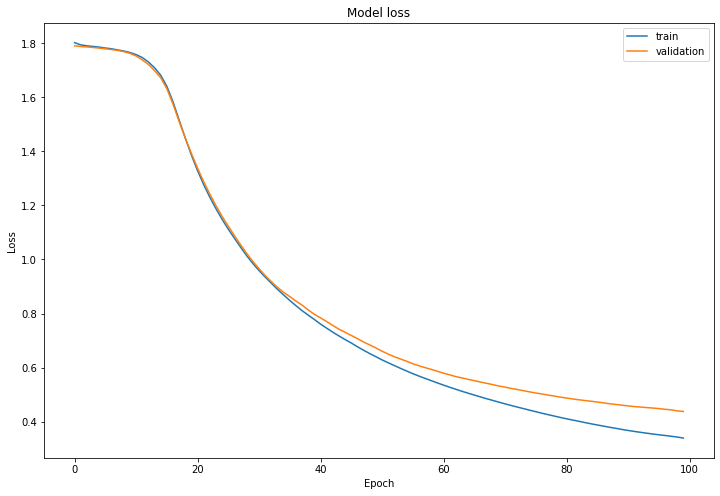

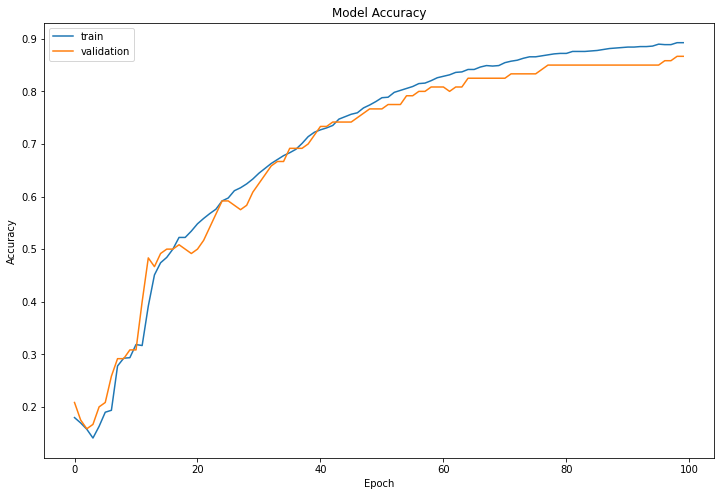

In [11]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')